In [386]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale


In [388]:
#load the data
mushroom_data=pd.read_csv("Downloads/SVM/SVM/mushroom.csv")
#Exploratory Datasets
print("Total missing Values in the mushroom dataset:",mushroom_data.isna().sum().sum())
#find duplicates in  dataset
print("No.of duplicate in mushroom datasets:",end=" ")
print(mushroom_data.duplicated().sum()) 
mushroom_data=mushroom_data.drop_duplicates()
#check any duplicate in dataset after drop
print("No.of duplicate in datasets after drop:",end=" ")
print(mushroom_data.duplicated().sum())
#Select categorical data
print(mushroom_data["class"].value_counts())
print(mushroom_data.columns)


Total missing Values in the mushroom dataset: 0
No.of duplicate in mushroom datasets: 1024
No.of duplicate in datasets after drop: 0
class
poisonous    618
edible       358
Name: count, dtype: int64
Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


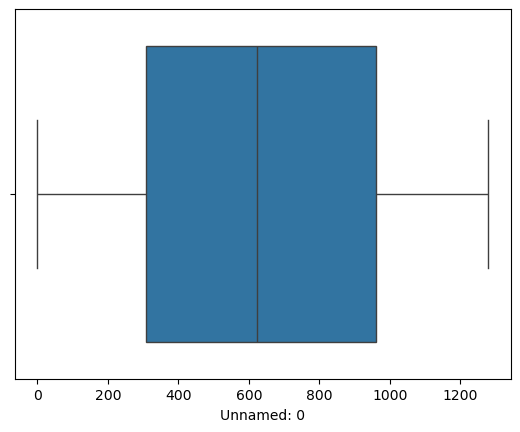

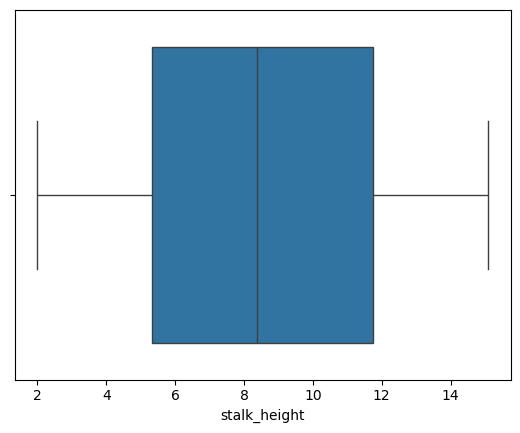

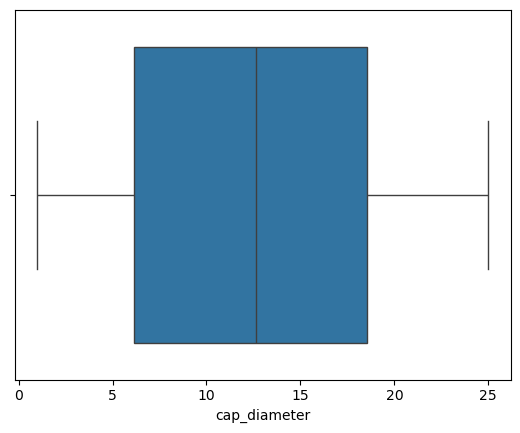

In [390]:
##Find outliers using boxplot for mushroom  dataset
for i in mushroom_data.select_dtypes(include="number").columns:
    sns.boxplot(data=mushroom_data,x=i)
    plt.show()

In [392]:
#summary data
print("The Five summary for data:\n")
print(mushroom_data.describe())

The Five summary for data:

        Unnamed: 0  stalk_height  cap_diameter
count   976.000000    976.000000    976.000000
mean    633.275615      8.524684     12.598566
std     372.262936      3.703043      6.987077
min       0.000000      2.000000      1.000000
25%     306.750000      5.326820      6.141161
50%     622.500000      8.367245     12.626094
75%     959.250000     11.758624     18.559780
max    1279.000000     15.095066     25.000054


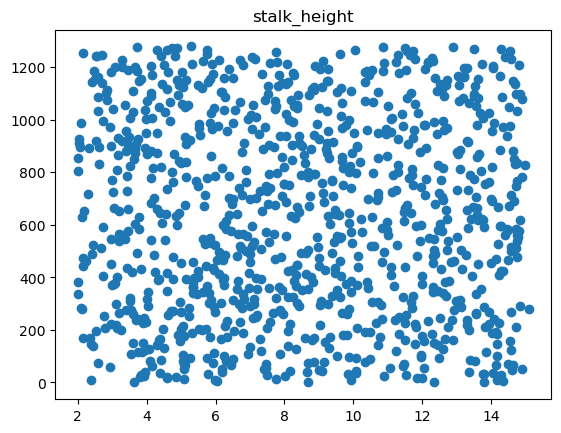

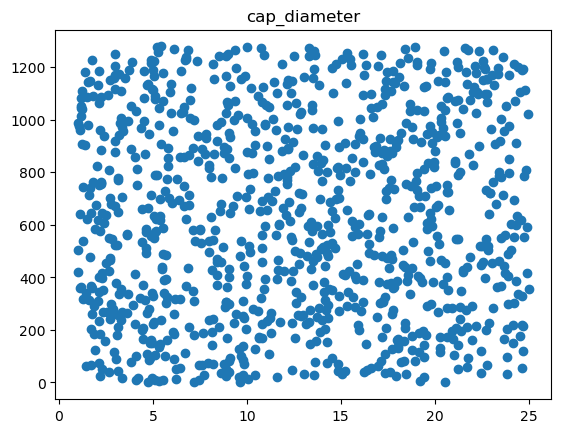

In [394]:
#plot scatterplot against numerical variable of mushroom data
mushroom_data=mushroom_data.rename(columns={"Unnamed: 0":"quantity"})
num=mushroom_data.select_dtypes(exclude=["object"])
for k in num:
    if k!="quantity":
        plt.scatter(mushroom_data[k],mushroom_data["quantity"])
        plt.title(k)
        plt.show()

<Axes: xlabel='population', ylabel='habitat'>

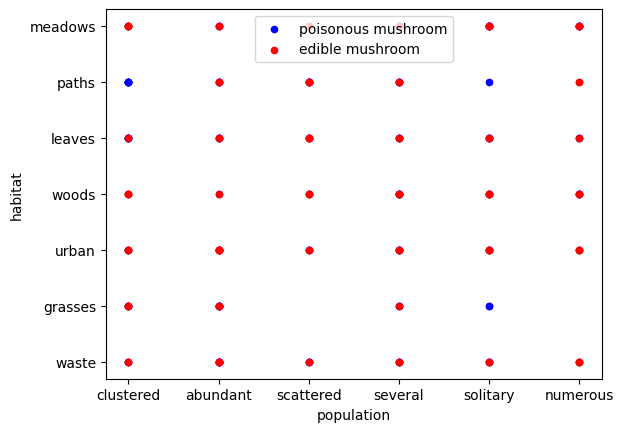

In [396]:
poisonous1=mushroom_data[mushroom_data["class"]=="poisonous"][0:100]
edible1=mushroom_data[mushroom_data["class"]=="edible"][0:100]
axes=poisonous1.plot(kind="scatter",x="population",y="habitat",color="blue",label="poisonous mushroom")
edible1.plot(kind="scatter",x="population",y="habitat",color="red",label="edible mushroom",ax=axes)


In [398]:
#Feature Engineering
#label encoding for categorical data
#convert the categorical variable into numerical variable for data
for i in mushroom_data.select_dtypes(include="object").columns:
    mushroom_data[i]=mushroom_data[i].astype('category')
    mushroom_data[i]=mushroom_data[i].cat.codes
print(mushroom_data.info())
print(mushroom_data.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   quantity                  976 non-null    int64  
 1   cap_shape                 976 non-null    int8   
 2   cap_surface               976 non-null    int8   
 3   cap_color                 976 non-null    int8   
 4   bruises                   976 non-null    int8   
 5   odor                      976 non-null    int8   
 6   gill_attachment           976 non-null    int8   
 7   gill_spacing              976 non-null    int8   
 8   gill_size                 976 non-null    int8   
 9   gill_color                976 non-null    int8   
 10  stalk_shape               976 non-null    int8   
 11  stalk_root                976 non-null    int8   
 12  stalk_surface_above_ring  976 non-null    int8   
 13  stalk_surface_below_ring  976 non-null    int8   
 14  stalk_color_ab

In [400]:
#select the train and test data

x=mushroom_data[["odor","quantity"]]
y=mushroom_data["class"]
print(x.columns)

feature=x.columns


Index(['odor', 'quantity'], dtype='object')


In [402]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)
x_scale[:3]

array([[-1.16442735,  1.43446465],
       [-1.16442735,  1.08507007],
       [ 0.01368021, -0.87153954]])

In [404]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.20,random_state=25)

In [406]:
model=SVC(kernel="linear",random_state=25)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy on testing data is:",model.score(x_test,y_test))
print("Accuracy on training data is:",model.score(x_train,y_train))

Accuracy on testing data is: 0.7040816326530612
Accuracy on training data is: 0.6153846153846154


In [408]:
from sklearn.metrics import classification_report
print("The classification Report:")
print(classification_report(y_test,y_pred))

The classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.70      1.00      0.83       138

    accuracy                           0.70       196
   macro avg       0.35      0.50      0.41       196
weighted avg       0.50      0.70      0.58       196



C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [410]:
#kernel=rbf
grid=SVC(kernel="rbf",random_state=25)
grid.fit(x_train,y_train)
y_pred_rbf=grid.predict(x_test)
print("Accuracy on testing data is:",grid.score(x_test,y_test))
print("Accuracy on training data is:",grid.score(x_train,y_train))

Accuracy on testing data is: 0.7040816326530612
Accuracy on training data is: 0.6153846153846154


In [412]:
from sklearn.metrics import classification_report
print("The classification Report:")
print(classification_report(y_test,y_pred_rbf))

The classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.70      1.00      0.83       138

    accuracy                           0.70       196
   macro avg       0.35      0.50      0.41       196
weighted avg       0.50      0.70      0.58       196



C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [139]:
grid_poly=SVC(kernel="poly",random_state=25)
grid_poly.fit(x_train,y_train)
y_pred_poly=grid_poly.predict(x_test)
print("Accuracy on testing data is:",grid_poly.score(x_test,y_test))
print("Accuracy on training data is:",grid_poly.score(x_train,y_train))

Accuracy on testing data is: 0.7040816326530612
Accuracy on training data is: 0.6153846153846154


In [141]:
from sklearn.metrics import classification_report
print("The classification Report:")
print(classification_report(y_test,y_pred_poly))

The classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.70      1.00      0.83       138

    accuracy                           0.70       196
   macro avg       0.35      0.50      0.41       196
weighted avg       0.50      0.70      0.58       196



C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Index(['odor', 'quantity'], dtype='object')


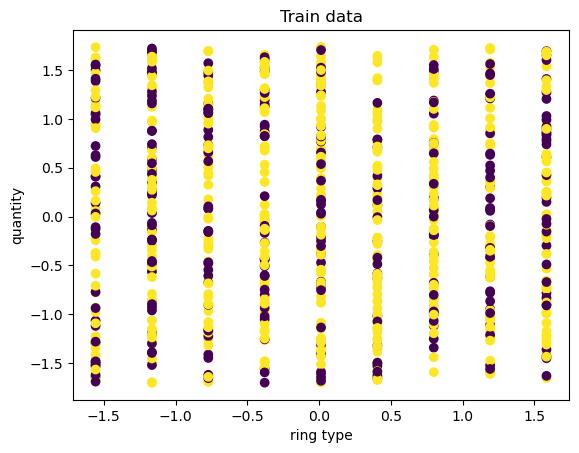

In [310]:
#plot the train set
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlabel("ring type")
plt.ylabel("quantity")
plt.title("Train data")
plt.show()

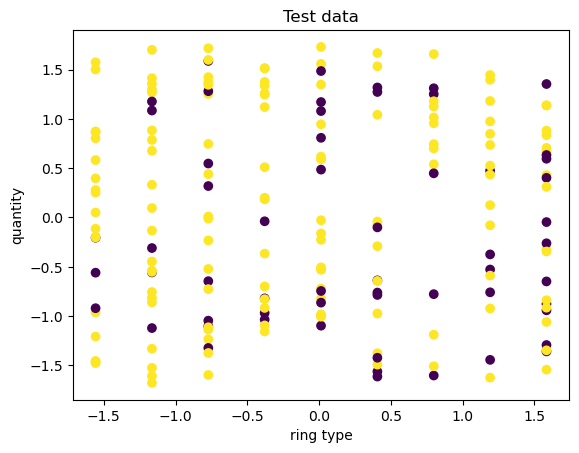

In [308]:
#plot the test set
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.xlabel("ring type")
plt.ylabel("quantity")
plt.title("Test data")
plt.show()